<img src="https://devra.ai/analyst/notebook/2792/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">  <div style="font-size:150%; color:#FEE100"><b>Uncorking Secrets in Wine Quality Data</b></div>  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>A curious observation: wine, like life, only gets better with time. In this notebook we explore red and white wine quality data and try to predict the quality based on various chemical properties. If you find the insights useful, feel free to upvote.

# Table of Contents
1. [Data Loading and Exploration](#Data-Loading-and-Exploration)
2. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
4. [Feature Engineering and Model Building](#Feature-Engineering-and-Model-Building)
5. [Conclusions and Summary](#Conclusions-and-Summary)

In [1]:
# Importing necessary libraries and suppressing warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is imported
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

# For model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Setting a random seed for reproducibility
RANDOM_STATE = 42

In [2]:
# Data Loading and Exploration
# Loading the red and white wine quality dataset
data_path = '/kaggle/input/red-and-white-wine-quality/Red and White Wine Quality.csv'
df = pd.read_csv(data_path, delimiter=',', encoding='ascii')

# Displaying the first few rows to get an initial understanding of the data
print('Data Head:')
print(df.head())

# Displaying the info to check dtypes and non-null count
print('\nData Info:')
print(df.info())

Data Head:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  

In [3]:
# Data Cleaning and Preprocessing
# Checking for missing values in the dataframe
missing_values = df.isnull().sum()
print('Missing Values in Each Column:')
print(missing_values)

# Since there are no explicit date columns provided we do not perform date conversion.

# A quick check for duplicate rows
duplicate_count = df.duplicated().sum()
print('\nNumber of Duplicate Rows: ', duplicate_count)

# If duplicates are present, one might consider removing them
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print('Duplicates removed.')

# Printing summary statistics for a quick glance at the spread of values
print('\nSummary Statistics:')
print(df.describe())

Missing Values in Each Column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Number of Duplicate Rows:  1177
Duplicates removed.

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.40

Numeric features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


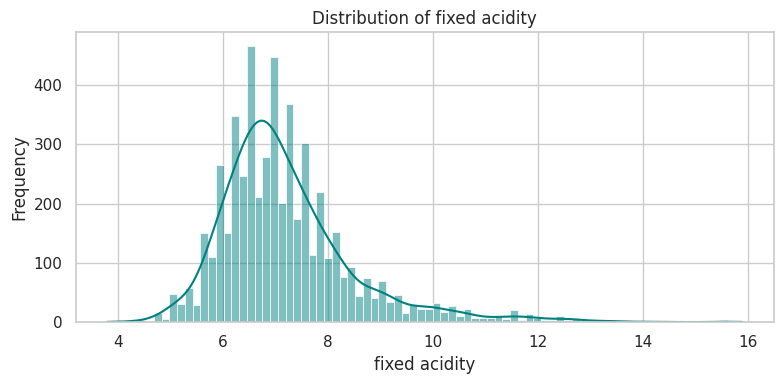

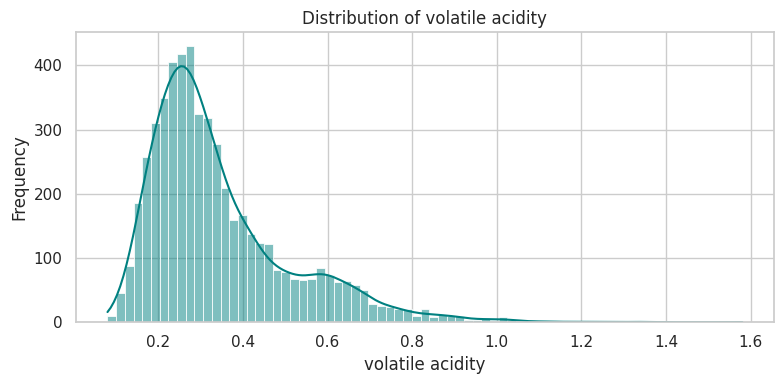

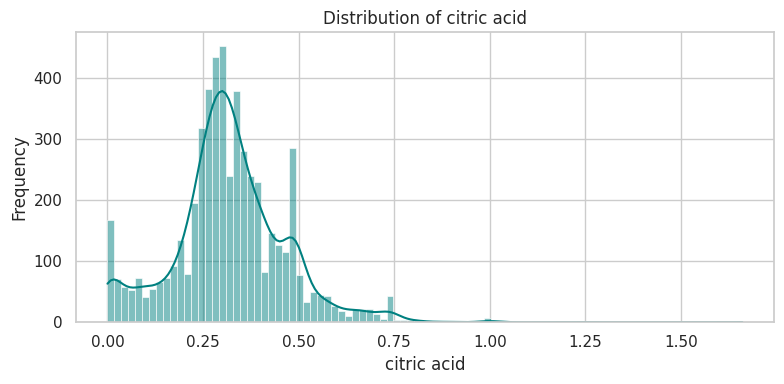

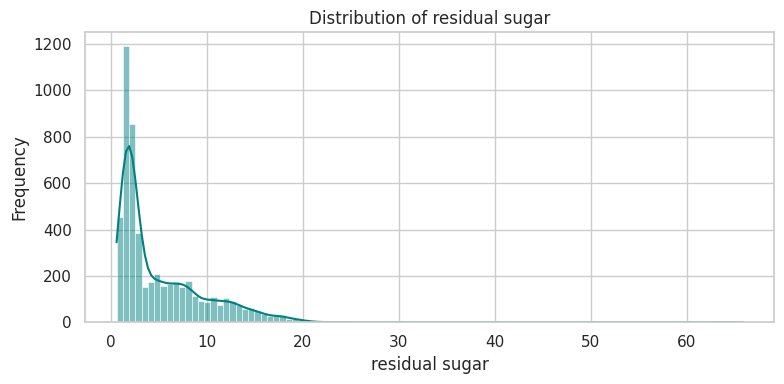

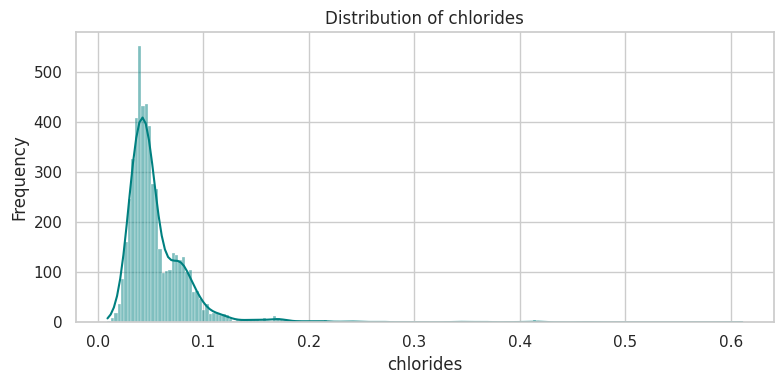

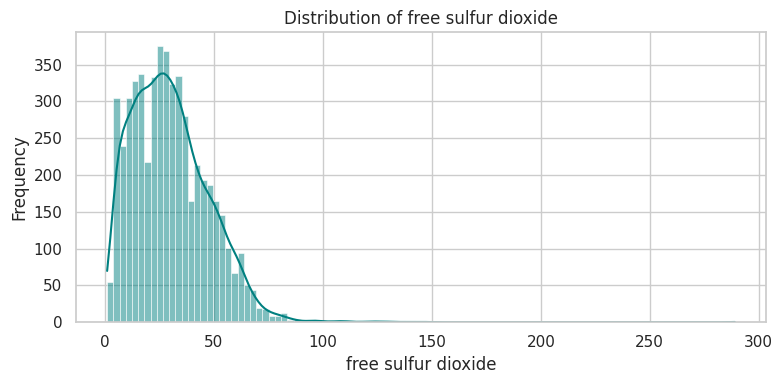

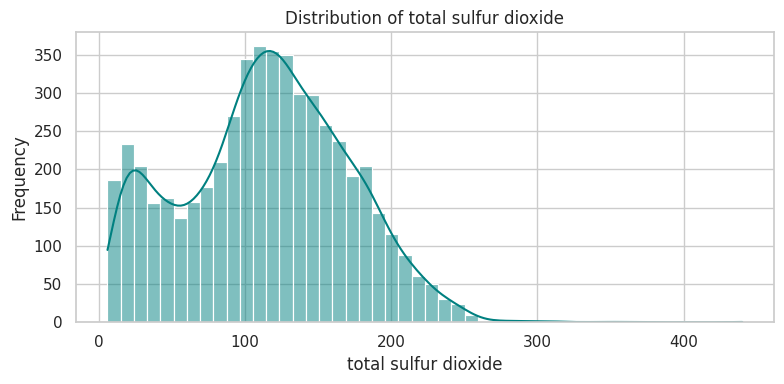

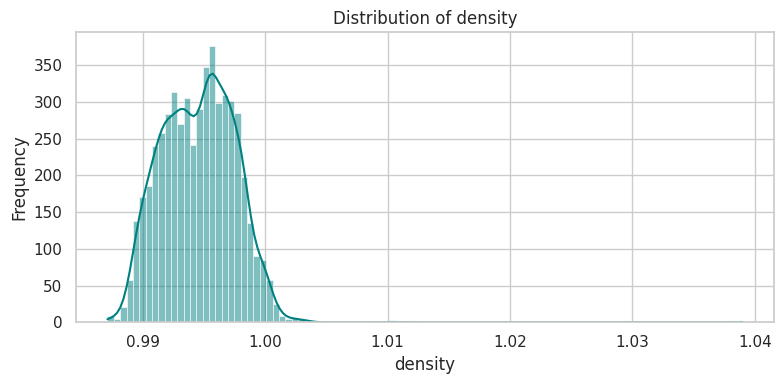

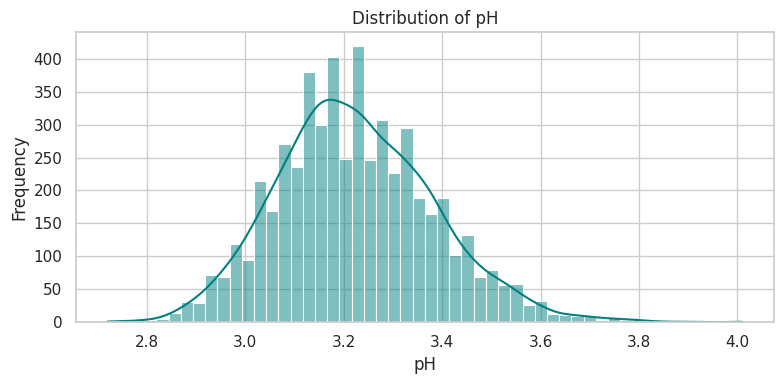

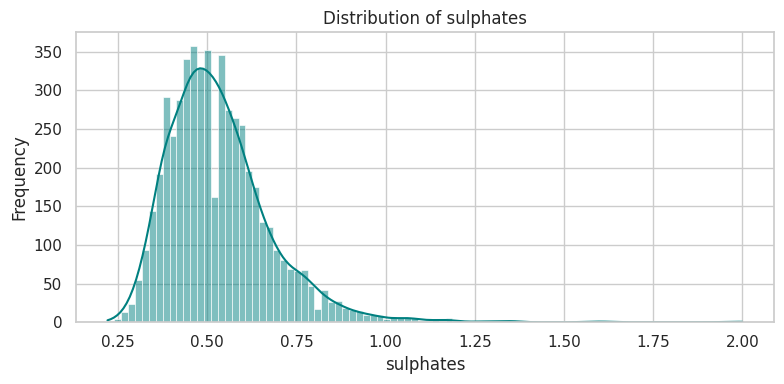

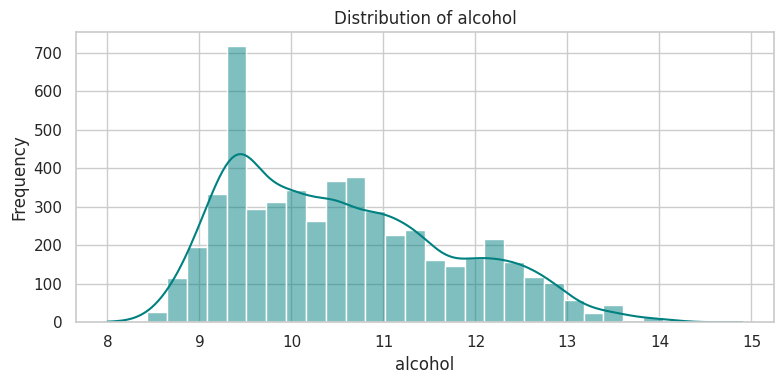

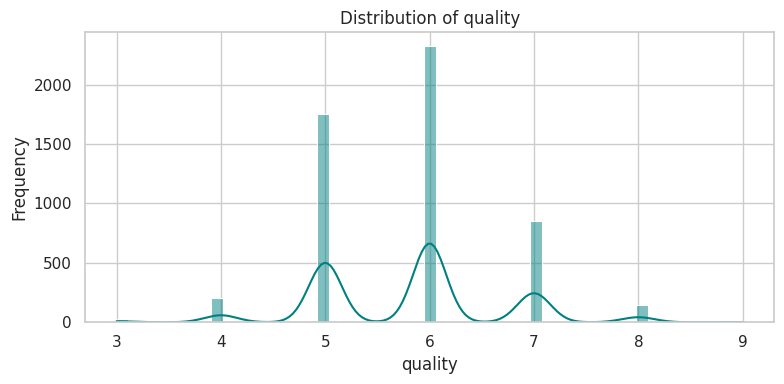

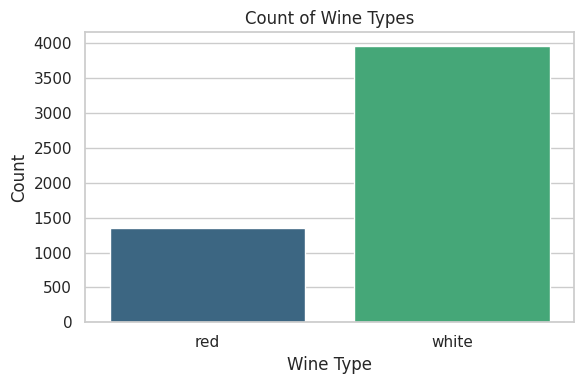

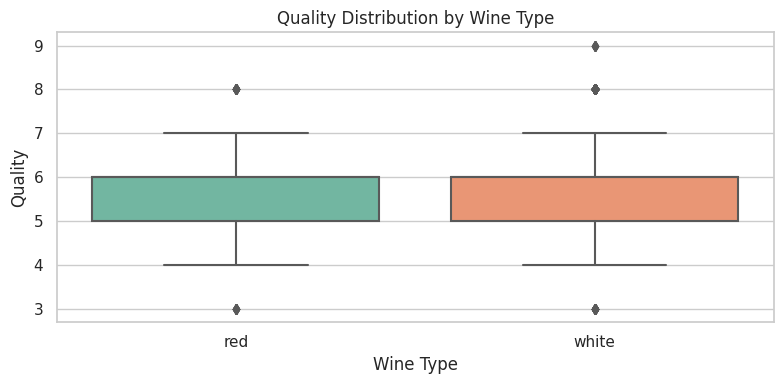

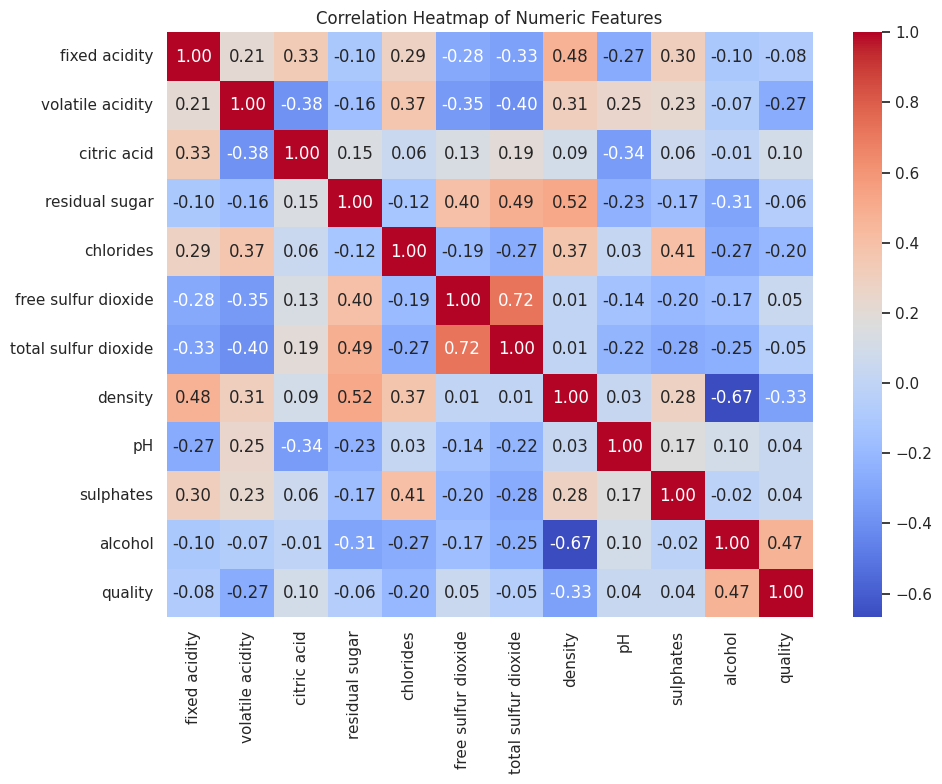

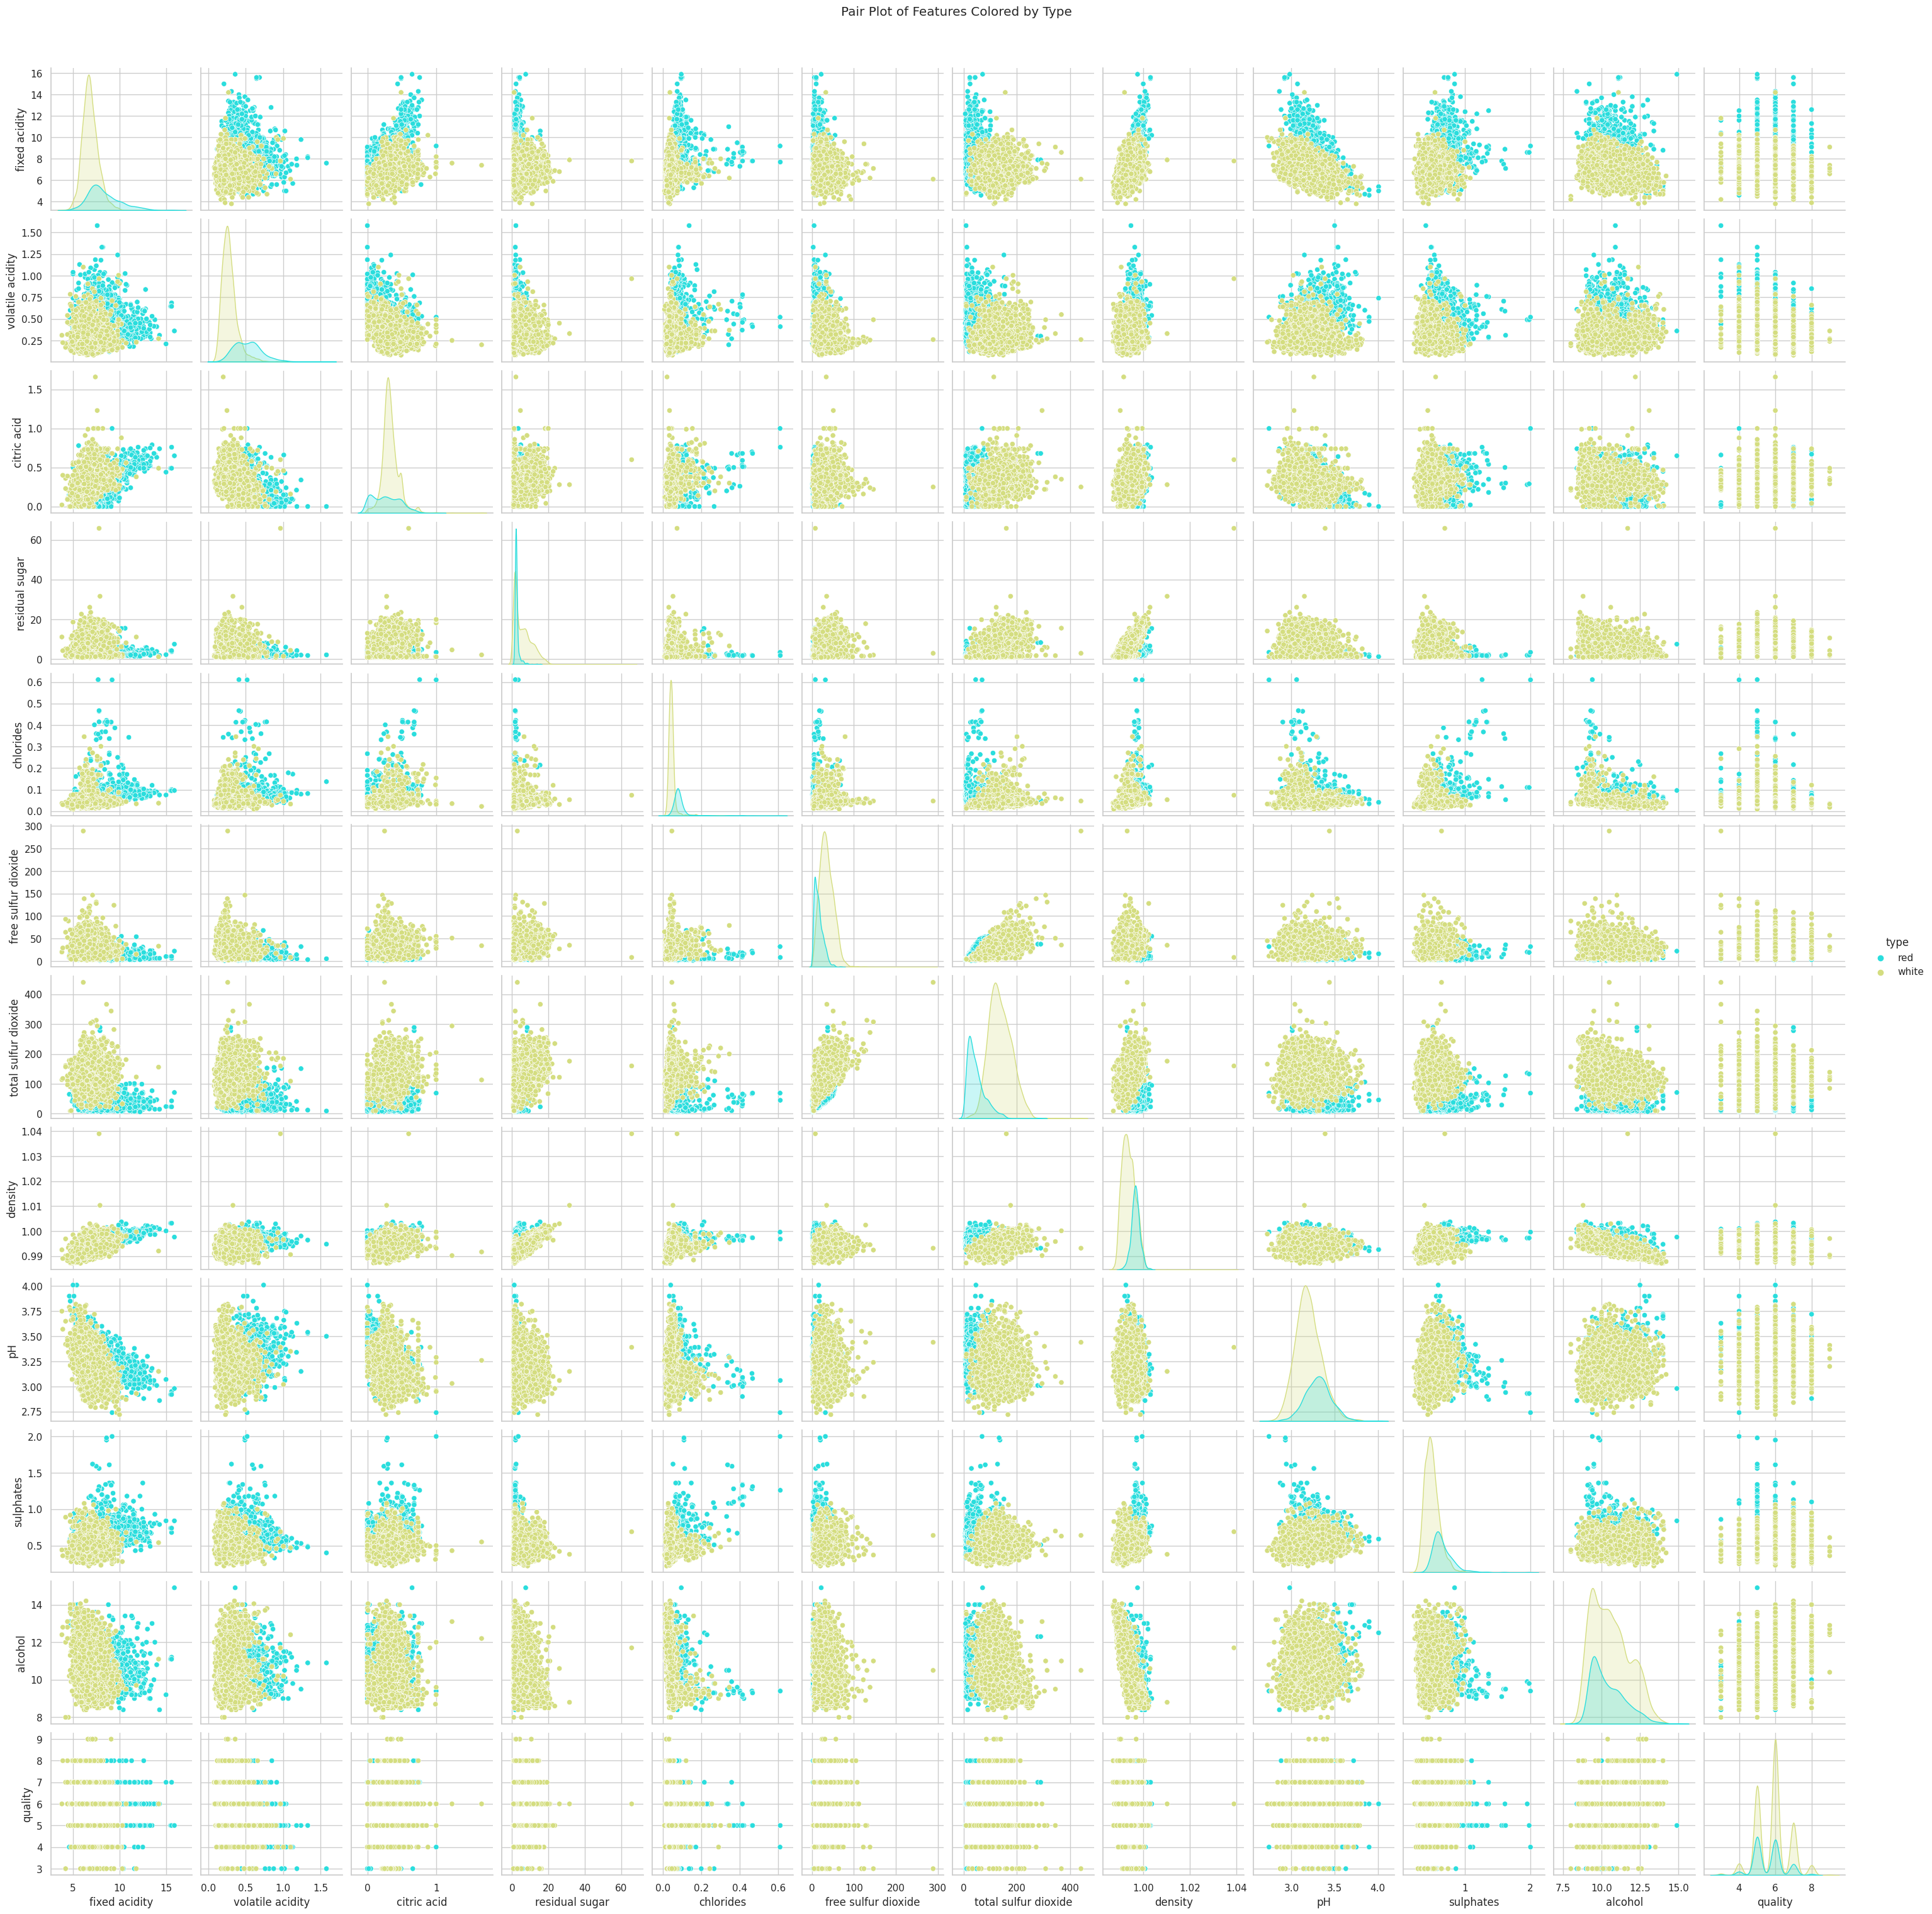

In [4]:
# Exploratory Data Analysis (EDA)
# Let's create some visualizations to understand the data distribution.

# 1. Histogram plots for numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric features:', numeric_features)

for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 2. Count plot for the 'type' column (red or white) using a pie-like count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Count of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Box plots to view the variations in quality across wine types
plt.figure(figsize=(8, 4))
sns.boxplot(x='type', y='quality', data=df, palette='Set2')
plt.title('Quality Distribution by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Quality')
plt.tight_layout()
plt.show()

# 4. Check for correlations among numeric features only if there are 4 or more numeric attributes
if len(numeric_features) >= 4:
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

# 5. A pair plot to uncover pairwise relationships
sns.pairplot(df, hue='type', palette='rainbow')
plt.suptitle('Pair Plot of Features Colored by Type', y=1.02)
plt.show()

Random Forest Regressor R2 Score: 0.4138
Random Forest Regressor Mean Squared Error: 0.4407


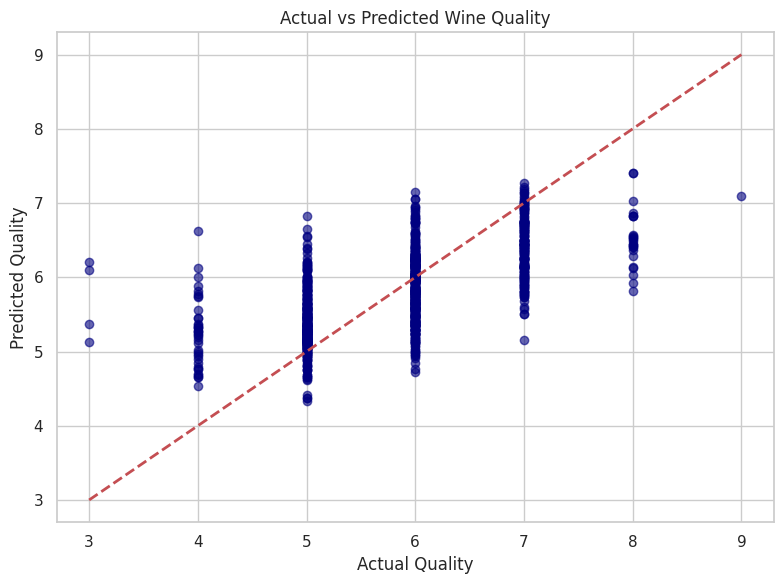

In [5]:
# Feature Engineering and Model Building
# In this section, we attempt to predict the wine quality based on all the chemical properties.

# Separating the target variable 'quality' from the features
X = df.drop('quality', axis=1)
y = df['quality']

# As the 'type' column is categorical, convert it to numeric using one-hot encoding
X = pd.get_dummies(X, columns=['type'], drop_first=True)  # drop_first helps avoid multicollinearity

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Initializing and training a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
predictions = rf_regressor.predict(X_test)

# Evaluating the model performance using R2 score and Mean Squared Error
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'Random Forest Regressor R2 Score: {r2:.4f}')
print(f'Random Forest Regressor Mean Squared Error: {mse:.4f}')

# Displaying a scatter plot of Actual vs Predicted quality
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Wine Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.tight_layout()
plt.show()

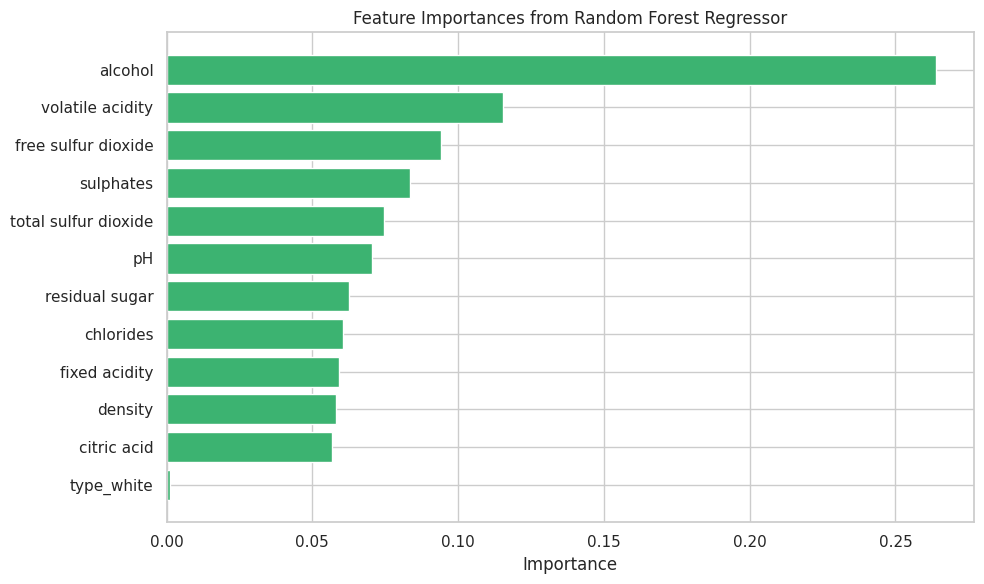

In [6]:
# Permutation Importance / Feature Importances from the model
# Extracting feature importances from the trained Random Forest model
importances = rf_regressor.feature_importances_
feature_names = X.columns

# Creating a DataFrame to visualize feature importance
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='mediumseagreen')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Regressor')
plt.tight_layout()
plt.show()

# Conclusions and Summary

In this notebook we delved into the intricacies of wine quality by exploring a dataset that encapsulates the chemical properties of red and white wines. Our analysis covered:

- Data Loading and initial exploration to understand the makeup of the dataset.
- Data Cleaning to ensure we were not dealing with any missing or duplicate values.
- A comprehensive Exploratory Data Analysis using a variety of plots (histograms, box plots, heatmaps, and pair plots) to unearth underlying patterns.
- Developing a predictive model using a Random Forest Regressor to predict wine quality, complete with an evaluation of its performance metrics.

The chosen approach using Random Forest Regressor provided a reasonable prediction with an R2 score that leaves room for further fine-tuning and experimentation. Future analyses could explore additional machine learning techniques, hyperparameter tuning, or even ensemble methods to further boost prediction accuracy.

If you found the exploratory journey through the vineyards of data insightful, do upvote this notebook. Remember, much like a well-aged wine, a little extra attention helps improve everything.